Mostrando partidas jugadas
[1 2 3 4 5 6 7]
¿Qué partida quieres que grafiquemos? 2
Partida  Palabra  Nombre de evento
2        GATO     intento             5
         MESA     intento             1
         PERRO    intento             2
         SILLA    intento             3
Name: Palabra, dtype: int64


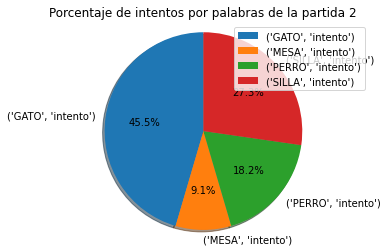

In [39]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

data_frame = pd.read_csv('datos de prueba.csv', encoding='utf-8')
data_frame['Palabra'].fillna('Sin datos', inplace = True)
data_frame['Estado '].fillna('Sin datos', inplace = True)
partidas = data_frame["Partida"].unique()
print("Mostrando partidas jugadas")
print(partidas)
opcion = int(input("¿Qué partida quieres que grafiquemos? "))
sub_data_frame = data_frame[(data_frame['Partida'] == opcion)&(data_frame['Nombre de evento'] == 'intento')]
df = sub_data_frame.groupby(['Partida', 'Palabra', 'Nombre de evento'])['Palabra'].count()[:5]
print(df)

#Grafico
datos_final = sub_data_frame.groupby(['Palabra', 'Nombre de evento'])['Palabra'].count()
etiquetas = datos_final.keys()
datos = datos_final.values
plt.pie(datos, labels=etiquetas, autopct='%1.1f%%',
shadow=True, startangle=90, labeldistance= 1.1)
plt.axis('equal')
plt.legend(etiquetas)
plt.title(f'Porcentaje de intentos por palabras de la partida {opcion}')
plt.show()





['pepe' 'jose' 'clara' 'flor']


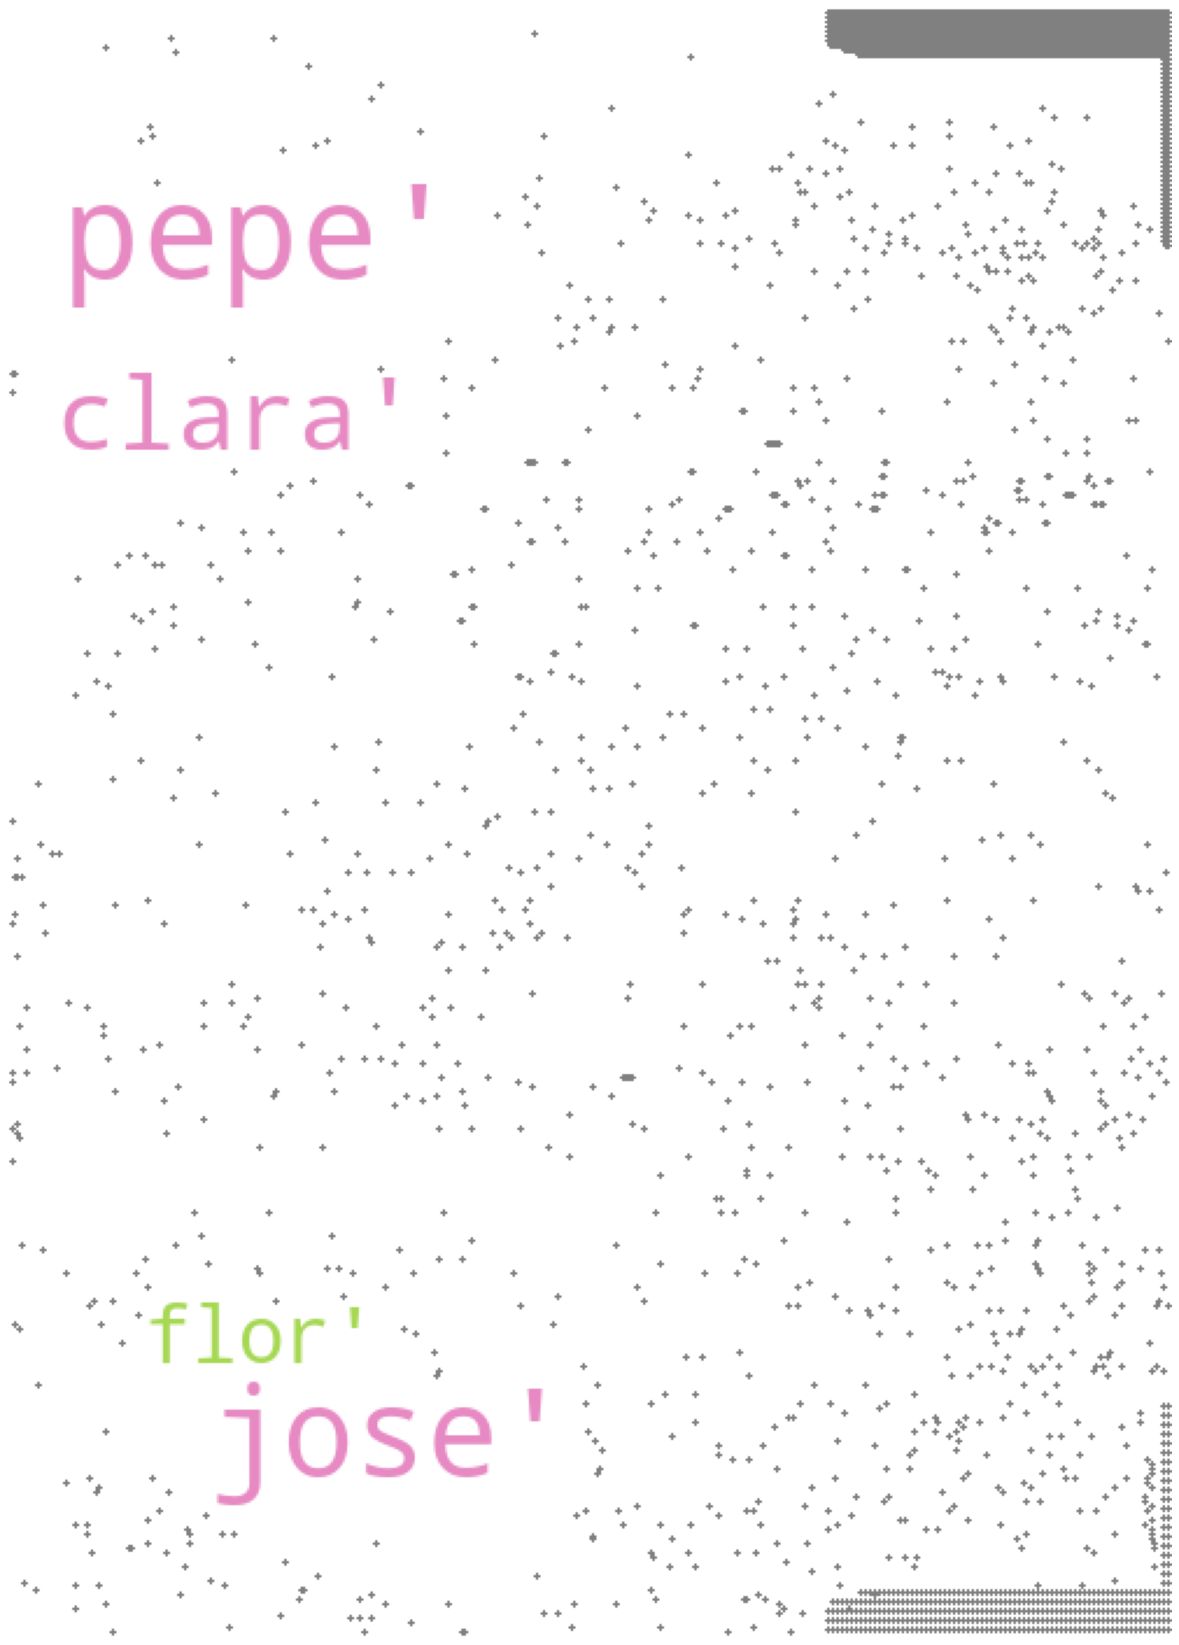

In [40]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt

data_frame = pd.read_csv('datos de prueba.csv', encoding='utf-8')
data_frame['Palabra'].fillna('Sin datos', inplace = True)
data_frame['Estado '].fillna('Sin datos', inplace = True)
palabras = data_frame[(data_frame['usuarie -edad'] > 13)&(data_frame['usuarie -edad'] < 35)]['Usuarie - nick'].unique()
print(palabras)

text = str(palabras)    
mask = np.array(Image.open('mascara.png'))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask, contour_width=3, contour_color='gray').generate(text)
plot_cloud(wordcloud)

